In [ ]:
##복잡도를 낮추는 기준점을 잘 잡아야한다.
## 하지만 상황에 따라, 예를들어 유죄판정을 하고 사형을 집행하는 상황이라 해보자
## 이때는 기준점을 복잡도만으로 볼것이 아니라 굉장히 보수적으로 잡을 필요도 있을 것이다.
## 상황에 대한 이해가 선행해야한다

In [ ]:
## 엔트로피 계산으로 대략적인 복잡도를 평가할 수 있다.
## 그룹별 엔트로피를 계산하고 가중평균으로 판단
## 엔트로피가 낮은게 덜 복잡하다는 뜻이니 대부분 더 나은 디시젼 메이킹
## 기준점이 어떤 구간안에 들어가면 엔트로피에 차이가 없는데 그렇다면 기준점 자체의 의미는 없다는 것인가..

In [ ]:
##오버피팅에 주의할 것
##오버피팅을 줄 일 수 있는 방법은??
## 각 구역에서 객체의 개수가 n개 이상일 때만 분류하기 -> 그러면 n개는 어떻게 잡을 래  -> min_samples_split

In [3]:
import pandas as pd
import os
## os는 경로설정

os.chdir(r'C:\Users\pc\Documents\data\iris')
##경로설정
## R로 치면 setwd

iris = pd.read_csv("IRIS.csv")
iris['id'] = range(len(iris))
iris.head()

iris['species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

In [ ]:
##의사결정나무의 특징
## 해석쉽고 빠름

In [4]:
##트레이닝 셋 분류
iris = iris[['id','sepal_length','sepal_width','petal_length','petal_width','species']]
iris.head()


train = iris.sample(100, replace=False, random_state = 2021)

train.reset_index().drop(['index'], axis = 1)

train = iris.sample(100, replace=False, random_state = 2021).reset_index().drop(['index'], axis = 1)

test = iris.loc[~iris['id'].isin(train['id'])].reset_index().drop(['index'],axis = 1)

In [5]:
train.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,42,4.4,3.2,1.3,0.2,Iris-setosa
1,22,4.6,3.6,1.0,0.2,Iris-setosa
2,80,5.5,2.4,3.8,1.1,Iris-versicolor
3,13,4.3,3.0,1.1,0.1,Iris-setosa
4,28,5.2,3.4,1.4,0.2,Iris-setosa


In [6]:
test.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,4.9,3.0,1.4,0.2,Iris-setosa
1,5,5.4,3.9,1.7,0.4,Iris-setosa
2,7,5.0,3.4,1.5,0.2,Iris-setosa
3,10,5.4,3.7,1.5,0.2,Iris-setosa
4,11,4.8,3.4,1.6,0.2,Iris-setosa


In [7]:
## 라이브러리
from sklearn.tree import DecisionTreeClassifier

In [8]:
#최소 열개포함으로 먼저 해보자
dt = DecisionTreeClassifier(min_samples_split = 10)

In [9]:
train.columns

Index(['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
dt.fit(train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']],train['species'] )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
test['pred'] = dt.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [12]:
(test['pred']==test['species']).mean()

0.92

In [ ]:
### 시각화 하고 인간이 해석할 수 있는 형태로 뱉을 수 있는게 장정

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt

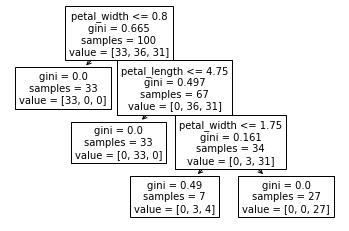

In [14]:
## 인자 3개 들어감 , 학습시킨 모델, input변수 , 폰트크기
a = tree.plot_tree(dt, feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], fontsize= 10)
plt.show(a)

In [ ]:
## depth가 너무 깊고 그림 크기가 좀 애매 할 수 있지 그러면 그림이 안이뻐

In [16]:
##그림 크기조절
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 10

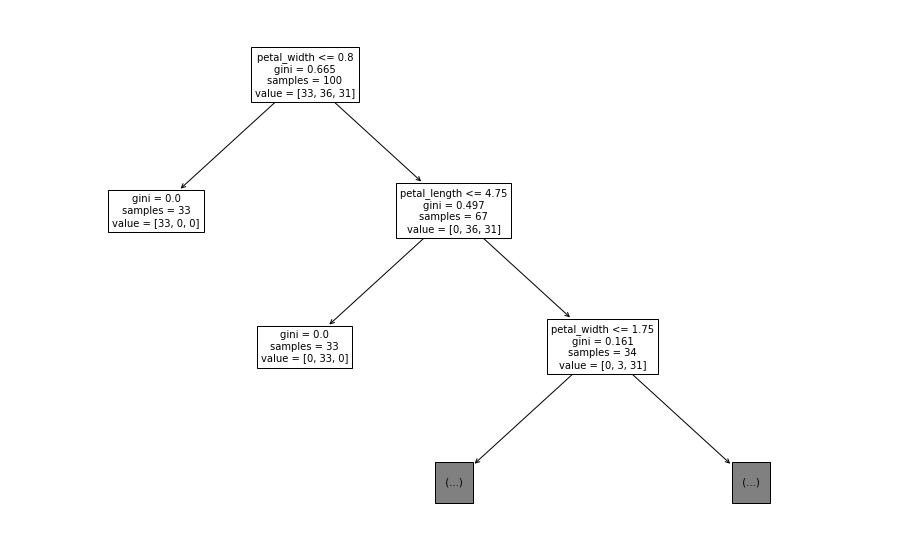

In [17]:
a = tree.plot_tree(dt, feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], fontsize= 10, max_depth=2)
plt.show(a)

In [ ]:
###Cross validation

In [18]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [19]:
dt = DecisionTreeClassifier(min_samples_split=10)

In [28]:
np.mean(cross_val_score(dt, iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']],iris['species'], cv=3))

0.9666666666666667

In [32]:
for  k in range(2,10):
    dt = DecisionTreeClassifier(min_samples_split=k)
    print(np.mean(cross_val_score(dt, iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']],iris['species'], cv=3)))

0.9733333333333333
0.9733333333333333
0.9733333333333333
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
